# Read the data

In [0]:
# importing the data
import pandas as pd
data = pd.read_csv("yes_bank.csv")

# Understand your data

In [0]:
# Columns present in our dataset
data.columns, len(data)

(Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object'), 10000)

In [0]:
############### Descriptions about the columns  #############
### RowNumber  : Row number in the dataset
### CustomerId : CustomerId given by the bank
### Surname.   : Last name of the person
### CreditScore: credit score given by the bank based on the usage of credit card and other factors
### Geography  : Main branch of the account
### Gender.    : Gender of the customer
### Age        : Age of the customer
### Tenure.    : How long the person has been acting as a customer to the bank
### Balance.   : Balance present in the account
### NumOfProducts: Number of plans customer has opted
### HasCrCard  : Whether the customer has Yes Bank credit card or not 
### IsActiveMember: Has made any transaction in last 1 month
### EstimatedSalary: Salary of the customer
### Exited: Whether still a person is a customer of Yes Bank or not

In [0]:
# print top 5 rows of dataframe
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Check for outliers

In [0]:
list(data.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

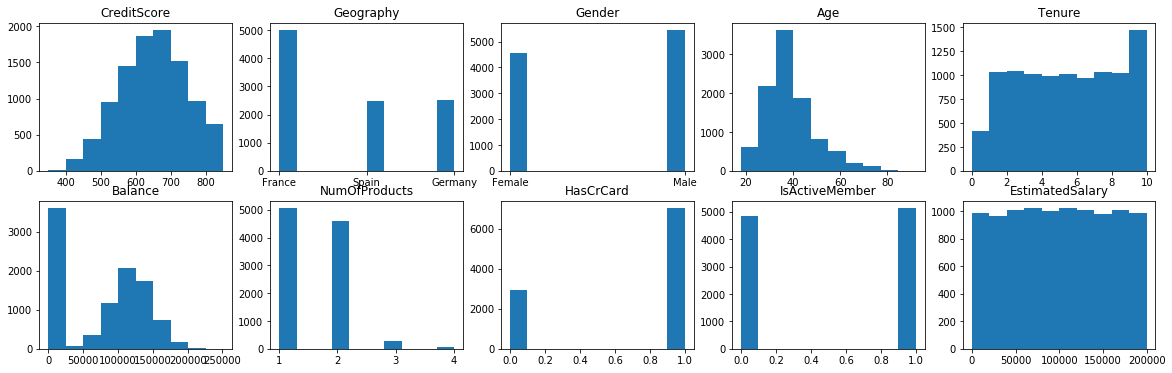

In [0]:
# CreditScore, Geography, Gender, Age, Tenure
# Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
## Check for outliers
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,6))
#plt.margins()   <-- try 

plt.subplot(2,5,1)
plt.title('CreditScore')
plt.hist(list(data['CreditScore']))

plt.subplot(2,5,2)
plt.title('Geography')
plt.hist(list(data['Geography']))

plt.subplot(2,5,3)
plt.title('Gender')
plt.hist(list(data['Gender']))

plt.subplot(2,5,4)
plt.title('Age')
plt.hist(list(data['Age']))

plt.subplot(2,5,5)
plt.title('Tenure')
plt.hist(list(data['Tenure']))

plt.subplot(2,5,6)
plt.title('Balance')
plt.hist(list(data['Balance']))

plt.subplot(2,5,7)
plt.title('NumOfProducts')
plt.hist(list(data['NumOfProducts']))

plt.subplot(2,5,8)
plt.title('HasCrCard')
plt.hist(list(data['HasCrCard']))

plt.subplot(2,5,9)
plt.title('IsActiveMember')
plt.hist(list(data['IsActiveMember']))

plt.subplot(2,5,10)
plt.title('EstimatedSalary')
plt.hist(list(data['EstimatedSalary']))
plt.show()

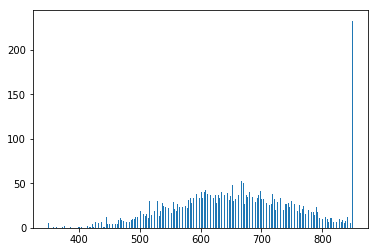

In [0]:
# don't look data from too far (bins=1) or too close (bins=1000)
plt.hist(list(data['CreditScore']), bins=1000)
plt.show()

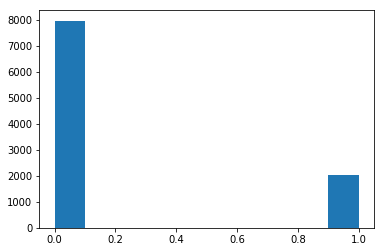

In [0]:
plt.hist(list(data['Exited']))
plt.show()

#1. Imbalance in target variable 1. train   2. Up sampling 3. Down sampling  4. SMOTE -- Up sampling
#2. Missing of target   --> remove it 

# Check for null values

In [0]:
## Check for null values
data.isnull().sum()
# if there are any missing values are present in column 'X' replace those nans with mean of column 'X' or meadian of column 'X' or most_frequent

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Deal with different data types

In [0]:
# print top 8 rows of dataframe
data.head(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [0]:
# Geography categorical variable -- > one hot representation
# Gender categorical variable -- > one hot representation

In [0]:
############ Convert encoded categorical variables to one hot vectors

def convert_to_one_hot_vector(df,column_name):
  unique_values = list(set(df[column_name]))
  dt = dict(zip(unique_values,range(len(unique_values))))
  print("Found categories:",unique_values)
  hot_vectors = []
  for x in df[column_name]:
    res = [0]*len(unique_values)
    res[dt[x]] = 1
    hot_vectors.append(res)
  return pd.DataFrame(hot_vectors, columns=[str(x)+"_"+column_name for x in unique_values])

In [0]:
# get the encoded hot vector for gender
gend_hot_enc = convert_to_one_hot_vector(data,'Gender')
# print top 2 rows of gend_hot_enc
gend_hot_enc.head(2)

Found categories: ['Male', 'Female']


,Male_Gender,Female_Gender
0,0,1
1,0,1


In [0]:
# get the encoded hot vector for Geography
geo_hot_enc = convert_to_one_hot_vector(data,'Geography')
# print top 2 rows of geo_hot_enc
geo_hot_enc.head(2)

Found categories: ['France', 'Spain', 'Germany']


,France_Geography,Spain_Geography,Germany_Geography
0,1,0,0
1,0,1,0


In [0]:
# Dummy variable trap explanation
# y = ax1 + bx2. + cx3 
# y = ax1 + cx3
# Remove one column from gend_hot_enc
del gend_hot_enc['Male_Gender']
# Remove one column from geo_hot_enc
del geo_hot_enc['Spain_Geography']

In [0]:
gend_hot_enc.head(8)

,Female_Gender
0,1
1,1
2,1
3,1
4,1
5,0
6,0
7,1


In [0]:
geo_hot_enc.head(8)

,France_Geography,Germany_Geography
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0
5,0,0
6,1,0
7,0,1


In [0]:
# whenever you have a categorical variable column 'column_x'. This particular column has n categories.
# Select n-1 categories in one hot vector representation

In [0]:
# delte Gender column and append gend_hot_enc
data = pd.concat([data,gend_hot_enc,geo_hot_enc],axis=1)

In [0]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female_Gender,France_Geography,Germany_Geography
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0


In [0]:
# delte Geography column and append geo_hot_enc
del data['Geography']
del data['Gender']

In [0]:
print(list(data.columns))

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Female_Gender', 'France_Geography', 'Germany_Geography']


In [0]:
data = data[['Female_Gender', 'France_Geography', 'Germany_Geography','RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
data.head(2)

,Female_Gender,France_Geography,Germany_Geography,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,1,0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,1,0,0,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0


# Remove irrelevant data

In [0]:
data.head(2)

,Female_Gender,France_Geography,Germany_Geography,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,1,0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,1,0,0,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0


In [0]:
# Remove those columns which are irrelevant
del data['RowNumber']
del data['CustomerId']
del data['Surname']
# or
# del data[['RowNumber','CustomerId','Surname']]

In [0]:
data.head(2)

,Female_Gender,France_Geography,Germany_Geography,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,1,0,0,608,41,1,83807.86,1,0,1,112542.58,0


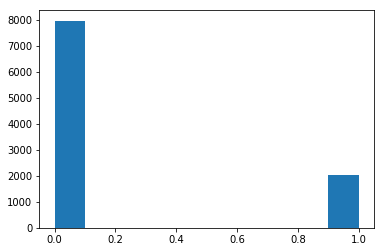

In [0]:
# Check for class imbalance
plt.hist(list(data['Exited']))
plt.show()

#1. Imbalance in target variable 1. train   2. Up sampling 3. Down sampling  4. SMOTE -- Up sampling
#2. Missing of target   --> remove it 

# Sampling

if you are doing sampling please skip next Train test split section

In [0]:
# from imblearn.over_sampling import SMOTE 
# print("Number of samples : ", len(data))

Number of samples :  10000


In [0]:
# X = data.iloc[:, :-1].values
# y = data.iloc[:,-1].values

In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [0]:
# print("No of samples in training dataset,",X_train.shape)

No of samples in training dataset, (8000, 11)


In [0]:
# sm = SMOTE()
# X_train,y_train = sm.fit_resample(X_train,y_train)

In [0]:
# print("No of samples in training dataset,",X_train.shape)

No of samples in training dataset, (12736, 11)



# Train Test split

In [0]:
data.head(2)

,Female_Gender,France_Geography,Germany_Geography,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,1,0,0,608,41,1,83807.86,1,0,1,112542.58,0


In [0]:
# Get all features into one matrix
#X = data.iloc[:, 0:11]
X = data.iloc[:, :-1].values
X

array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [0]:
# Get target into one matrix
y = data.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [0]:
X.shape # matrix of features

(10000, 11)

In [0]:
y.shape # array of target

(10000,)

In [0]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

# Feature scaling

In [0]:
X_train

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.63830640e+05],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 5.70980000e+04],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.85630760e+05],
       ...,
       [3.55395263e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.44604737e-01, 8.31682037e+04],
       [1.00000000e+00, 4.58201264e-01, 5.41798736e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.27515232e+05],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.69476988e-01, 0.00000000e+00, 1.49407788e+05]])

In [0]:
X_test

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.9285267e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.2870210e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 7.5732250e+04],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.4153319e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.1276480e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.9295060e+05]])

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
X_train

array([[ 1.08142361, -0.98241324, -0.69327587, ...,  0.69939283,
        -0.97650959,  1.10054991],
       [-1.05684771, -0.98241324,  1.59688937, ...,  0.69939283,
         1.15644765, -0.74883156],
       [ 1.08142361,  1.13049546, -0.69327587, ...,  0.69939283,
        -0.97650959,  1.4782857 ],
       ...,
       [-0.29691621, -0.98241324, -0.69327587, ...,  0.69939283,
         0.39840475, -0.29710703],
       [ 1.08142361, -0.0142758 ,  0.54753276, ...,  0.69939283,
        -0.97650959,  0.47130432],
       [ 1.08142361, -0.98241324,  1.59688937, ..., -1.24065151,
        -0.97650959,  0.85064177]])

In [0]:
# print number of training samples, number of test samples and shape of training sample
print("Shape of training samples",X_train.shape)
print('Shape of training target variable',y_train.shape)
print("Shape of test samples",X_test.shape)
print('Shape of test target variable',y_test.shape)

Shape of training samples (12736, 11)
Shape of training target variable (12736,)
Shape of test samples (2000, 11)
Shape of test target variable (2000,)


# Model development

In [0]:
X_train.shape

(12736, 11)

In [0]:
# import tensorflow
import tensorflow as tf

In [0]:
def get_batch(x,y,batch_size=1000):
  no_of_batches = x.shape[0]/batch_size
  if x.shape[0]%batch_size!=0:
    no_of_batches=no_of_batches+1
  for batch_id in range(int(no_of_batches)):
    start_index = (batch_id*batch_size)
    end_index = (batch_id*batch_size)+batch_size
    yield x[start_index:end_index], y[start_index:end_index], no_of_batches

In [0]:
# for batch_input, batch_target, batch_s in get_batch(X_train, y_train):
#   print(batch_input.shape)

In [0]:
# create ANN
tf.reset_default_graph()


############################ FEEDFORWARD NN ############################
# input layer
input_layer_input = tf.placeholder(shape=[None,11],dtype=tf.float64)
output_input_layer = input_layer_input
# 1st hidden layer
hidden_layer_1 = tf.contrib.layers.fully_connected(output_input_layer, num_outputs=5, activation_fn=tf.sigmoid)
# # 2nd hidden layer
# hidden_layer_2 = tf.contrib.layers.fully_connected(hidden_layer_1, num_outputs=3, activation_fn=tf.sigmoid)
#  output layer
output_layer = tf.contrib.layers.fully_connected(hidden_layer_1, num_outputs=1, activation_fn=tf.sigmoid)

############################ BP NN ############################
targets = tf.placeholder(shape=[None], dtype=tf.float64)
# loss function
# loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets,logits=tf.squeeze(output_layer))
loss = tf.losses.mean_squared_error(labels=targets,predictions=tf.squeeze(output_layer))
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# accuracy calculation
prediction = tf.cast(tf.greater_equal(tf.squeeze(output_layer),0.5), dtype=tf.float64)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(100):
    print("Epoch :",epoch)
    
    for batch_input, batch_target, no_of_batches in get_batch(X_train, y_train, batch_size=10):
      feed_dict = {
          input_layer_input: batch_input,
          targets: batch_target
      }
      output_of_nn, loss_of_nn,op  = sess.run([output_layer, loss, optimizer], feed_dict)
      
    feed_dict = {
       input_layer_input: X_test,
       targets: y_test
    }
    predictions_ = sess.run(prediction,feed_dict)
    ac = accuracy_score(y_test,predictions_)
    print(ac)
    print(confusion_matrix(y_test,predictions_))
    print("---------------------------------------")

Epoch : 0
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 1
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 2
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 3
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 4
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 5
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 6
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 7
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 8
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 9
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 10
0.2025
[[   0 1595]
 [   0  405]]
---------------------------------------
Epoch : 11
0.2025
[[   0 1595]
 [   0  405]]
------------------------------